In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

# Step 1: Load the data from a CSV file
data = pd.read_csv('sample_classifier.csv')



In [2]:
# Step 2: Replace missing values with zeros
def replace_missing_with_zeros(data):
    """
    Replace missing values with zeros in the dataset.

    Parameters:
    - data: pandas DataFrame, input dataset with missing values

    Returns:
    - data_filled: pandas DataFrame, dataset with missing values replaced by zeros
    """
    data = data.fillna(0)
    return data

data = replace_missing_with_zeros(data)

# Check for missing values after replacement
print(data.isnull().sum())

# Explore the data
print(data.head())



Species                                0
L/W ratio                              0
Leaf Height Including Petiole(cm)\n    0
Top Leaf Angle                         0
Base Leaf-Petiole Angle                0
dtype: int64
              Species  L/W ratio  Leaf Height Including Petiole(cm)\n  \
0     Bridelia retusa       2.83                                 16.2   
1     Psidium guajava       1.71                                 12.3   
2  Capparis zeylanica       1.91                                 11.6   
3     Bridelia retusa       2.41                                 15.3   
4     Psidium guajava       1.44                                 11.0   

   Top Leaf Angle  Base Leaf-Petiole Angle  
0              76                      114  
1             114                      127  
2              86                      108  
3              87                      136  
4             125                      137  


In [3]:
# Separate features and target
features = data.drop('Species', axis=1)
labels = data['Species'].to_numpy()  

In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize features (assuming numerical features)
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

In [6]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import KFold

# Assuming labels is a numpy array containing string labels
label_onehot = LabelEncoder()
integer_labels = label_onehot.fit_transform(labels)

# One-hot encode the integer labels
one_hot_labels = to_categorical(integer_labels)


# Assuming you have features_normalized and one_hot_labels already defined
splitter = KFold(n_splits=5, shuffle=True, random_state=42)

# Looping through each fold
for fold_number, (train_index, test_index) in enumerate(splitter.split(features_normalized), start=1):
    # Extracting data for training and testing in this fold
    train_features, test_features = features_normalized[train_index], features_normalized[test_index]
    train_labels, test_labels = one_hot_labels[train_index], one_hot_labels[test_index]  

In [7]:
from keras.models import load_model

# Load the saved model
model = load_model('final_model.h5')


In [8]:
from sklearn.metrics import classification_report

# Generate predictions for the current fold's test data
predictions = model.predict(test_features)

# Convert one-hot encoded labels to class labels
class_labels = np.argmax(test_labels, axis=1)

# Convert predicted probabilities to class labels
predictions_classes = np.argmax(predictions, axis=1)

# Generate classification report 
report = classification_report(class_labels, predictions_classes)


# Print the classification report 
print("Test Set Classification Report:")
print(report)


1/1 [==============================] - 0s 109ms/step
Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [10]:
class_names = ["Bridelia retusa", "Psidium guajava", "Capparis zeylanica"]


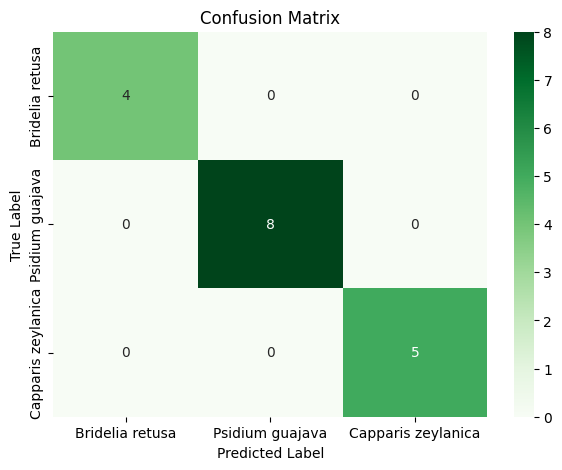

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Generate confusion matrix
matrix = confusion_matrix(class_labels, predictions_classes)

# Plot confusion matrix with green boxes
plt.figure(figsize=(7,5))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Greens", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [12]:
# Print the predicted classes with the maximum probability
for i, prediction in enumerate(predictions):
    max_probability = np.max(prediction)  # Find the max probability value
    # Find all indexes with the max probability
    max_indexes = np.flatnonzero(prediction == max_probability)
    # Loop through all max indexes to print each one
    for class_index in max_indexes:
        class_label = class_index + 1  # Adjust class index if labels are 1-based
        class_name = class_names[class_index]  # Get the class name using the index
        print(f"Sample {i+1}: Max Probability = {max_probability:.4f}, Class Label = {class_label}, Class Name = {class_name}")

Sample 1: Max Probability = 0.9973, Class Label = 3, Class Name = Capparis zeylanica
Sample 2: Max Probability = 0.9981, Class Label = 2, Class Name = Psidium guajava
Sample 3: Max Probability = 0.9993, Class Label = 2, Class Name = Psidium guajava
Sample 4: Max Probability = 0.9999, Class Label = 2, Class Name = Psidium guajava
Sample 5: Max Probability = 0.9994, Class Label = 1, Class Name = Bridelia retusa
Sample 6: Max Probability = 0.9484, Class Label = 2, Class Name = Psidium guajava
Sample 7: Max Probability = 1.0000, Class Label = 2, Class Name = Psidium guajava
Sample 8: Max Probability = 0.9933, Class Label = 3, Class Name = Capparis zeylanica
Sample 9: Max Probability = 0.9998, Class Label = 3, Class Name = Capparis zeylanica
Sample 10: Max Probability = 0.9983, Class Label = 2, Class Name = Psidium guajava
Sample 11: Max Probability = 0.9999, Class Label = 3, Class Name = Capparis zeylanica
Sample 12: Max Probability = 0.9980, Class Label = 3, Class Name = Capparis zeylanic

In [13]:
# Qualitative assessment

# Correct classifications
correct_indices = np.where(predictions_classes == class_label)[0]
correct_examples = test_features[correct_indices]  # Displaying only first 5 correct examples

print("Correctly classified examples:")
for example in correct_examples:
    print(f"{example}")

# Incorrect classifications
incorrect_indices = np.where(predictions_classes != class_label)[0]
incorrect_examples = test_features[incorrect_indices]  # Displaying only first 5 incorrect examples

print("\nIncorrectly classified examples:")
for example in incorrect_examples:
    print(f"{example}")


Correctly classified examples:
[-0.17031526 -0.36409568 -0.71908621 -0.8590054 ]
[-0.07474112 -0.48122043 -0.23054672 -1.41938274]
[ 0.08773491 -0.40313726 -0.78015364 -1.57949055]
[-0.29456163 -0.91067786  1.05186943 -2.05981399]
[-0.08429854 -1.18396896 -1.02442339 -1.49943665]
[-0.1989875  -0.71546994 -0.78015364 -0.61884368]
[-0.17031526 -0.36409568 -0.71908621 -0.8590054 ]
[-1.99578124  0.29961126 -1.08549082 -0.69889759]

Incorrectly classified examples:
[-0.36146353 -0.09080458  0.99080199  0.66201882]
[ 0.44135921  0.72906869 -0.96335595  1.30245007]
[-0.1989875  -0.24697092  0.68546481  0.3418032 ]
[-0.50482473 -0.52026202  1.1740043   0.90218054]
[-0.57172663 -0.63738677  1.29613917  0.98223444]
[-0.37102094 -0.09080458  1.05186943  0.66201882]
[ 0.42224438  1.08044296 -0.23054672  0.90218054]
[ 0.70896679  1.43181722 -1.32976056 -0.37868196]
[ 0.10684974  0.65098552 -1.02442339  1.7027196 ]
